## Loading the libraries and data 

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('/Users/claudia/Ironhack/Mid-Bootcamp Project/Linear_Regression_MidBootCampProject-/df_2nd_iter.csv')

In [3]:
data.head()

,Unnamed: 0,sqft_above,sqft_living15,bathrooms,view,sqft_basement,floors,grade,condition,yr_built,yr_renovated,floors.1,price
0,7316,1450,1260,1.0,0,0,1.0,7,4,1954,0,1.0,435000
1,20586,3310,2380,2.5,0,0,2.0,8,3,2012,0,2.0,555000
2,1040,1140,2200,2.5,0,800,1.0,7,4,1976,0,1.0,550000
3,20543,1280,1590,2.5,0,350,2.0,7,3,2009,0,2.0,295000
4,9587,1700,2380,2.5,0,900,1.0,9,4,1951,0,1.0,790000


In [4]:
data.shape

(21597, 13)

In [5]:
data = data.drop(['Unnamed: 0', 'floors.1'], axis =1)

In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_above     21597 non-null  int64  
 1   sqft_living15  21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   view           21597 non-null  int64  
 4   sqft_basement  21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   grade          21597 non-null  int64  
 7   condition      21597 non-null  int64  
 8   yr_built       21597 non-null  int64  
 9   yr_renovated   21597 non-null  int64  
 10  price          21597 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 1.8 MB


In [7]:
numericals = data.select_dtypes(np.number)
numericals

,sqft_above,sqft_living15,bathrooms,view,sqft_basement,floors,grade,condition,yr_built,yr_renovated,price
0,1450,1260,1.00,0,0,1.0,7,4,1954,0,435000
1,3310,2380,2.50,0,0,2.0,8,3,2012,0,555000
2,1140,2200,2.50,0,800,1.0,7,4,1976,0,550000
3,1280,1590,2.50,0,350,2.0,7,3,2009,0,295000
4,1700,2380,2.50,0,900,1.0,9,4,1951,0,790000
...,...,...,...,...,...,...,...,...,...,...,...
21592,1380,1810,1.75,1,600,1.0,8,4,1960,0,725000
21593,1410,2950,2.00,0,0,1.0,7,4,1985,0,335000
21594,1870,1870,2.00,0,0,1.5,7,3,1960,0,450000
21595,720,920,1.75,0,670,1.0,6,3,1941,0,445500


## Looking at discrete variables

In [8]:
discrete = [i for i in numericals if (len(numericals[i].unique()) < (numericals.shape[0] * 0.01))]
discrete

['bathrooms',
 'view',
 'floors',
 'grade',
 'condition',
 'yr_built',
 'yr_renovated']

In [9]:
discrete_df=numericals[discrete]


In [10]:
import matplotlib.colors as mcolors

def df_hist(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.distplot(df[col])
        
    plt.show()

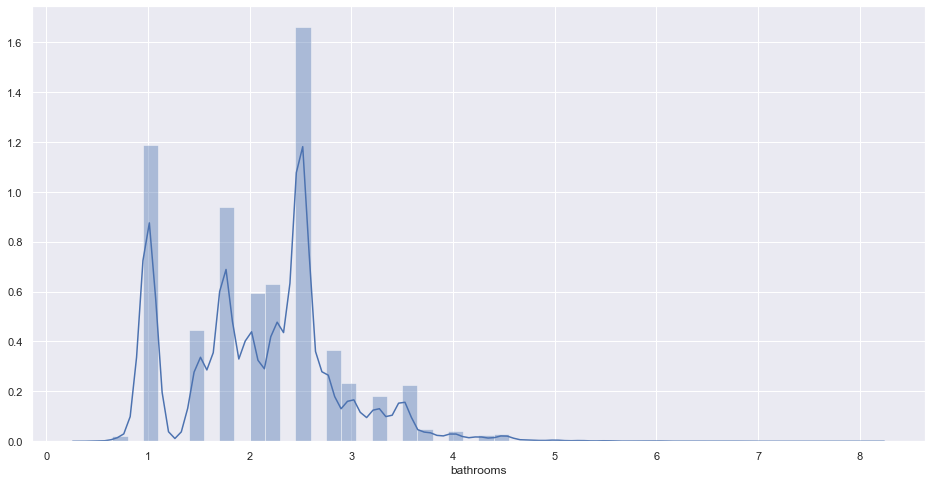

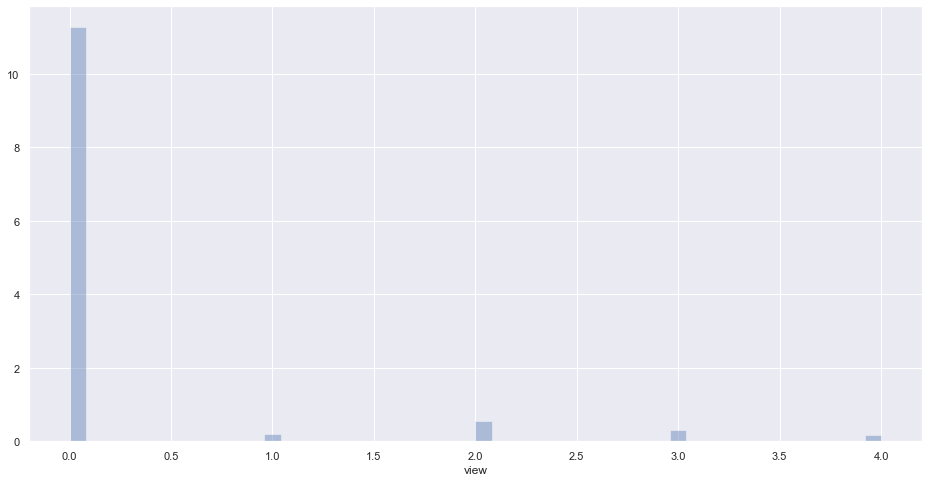

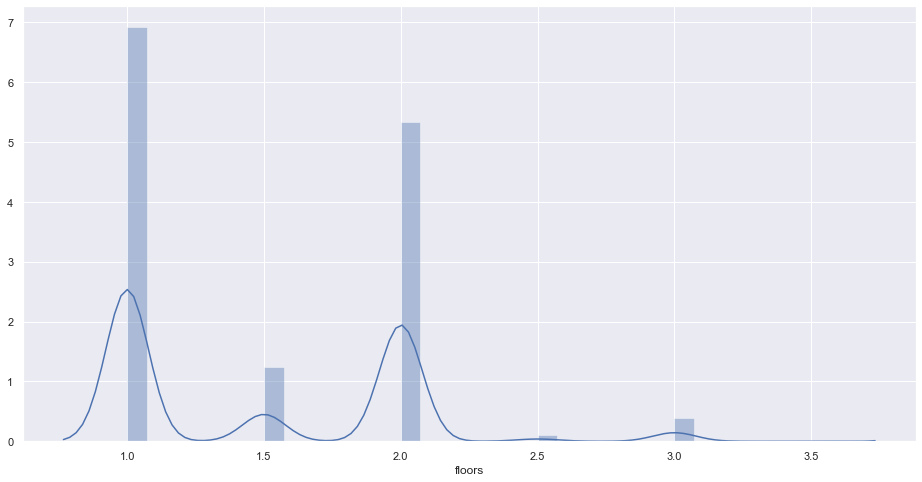

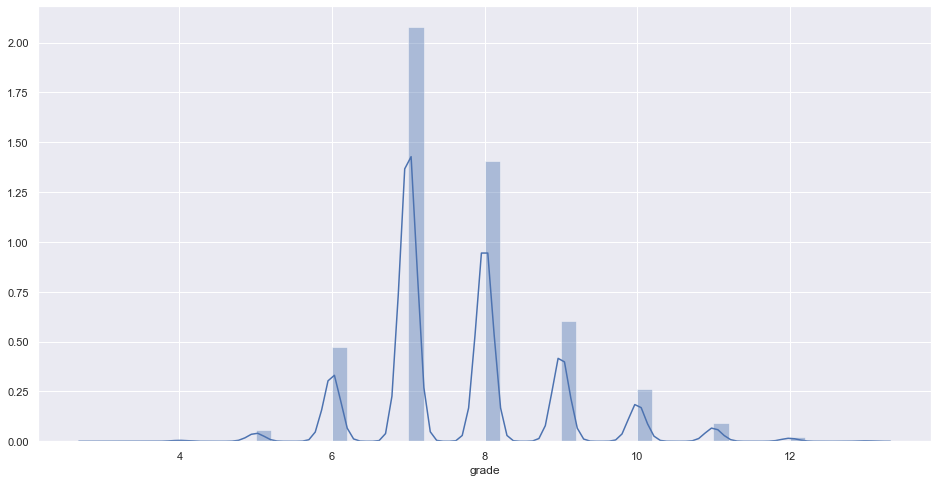

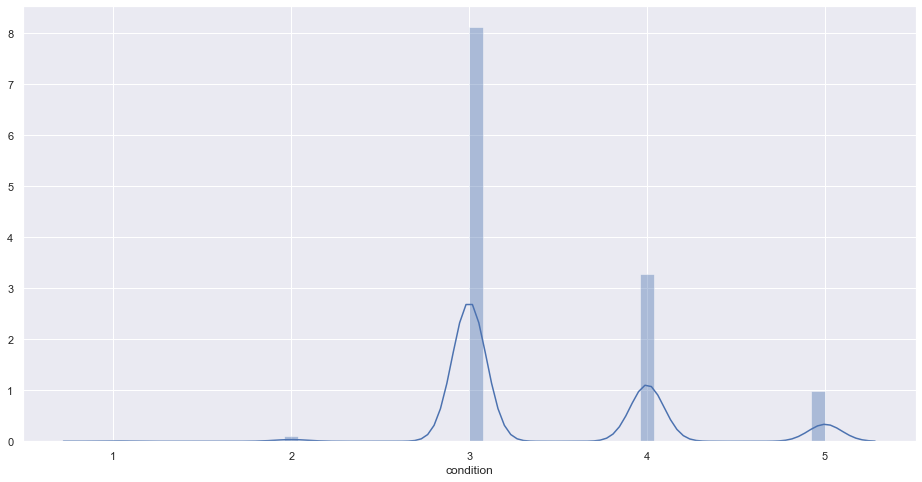

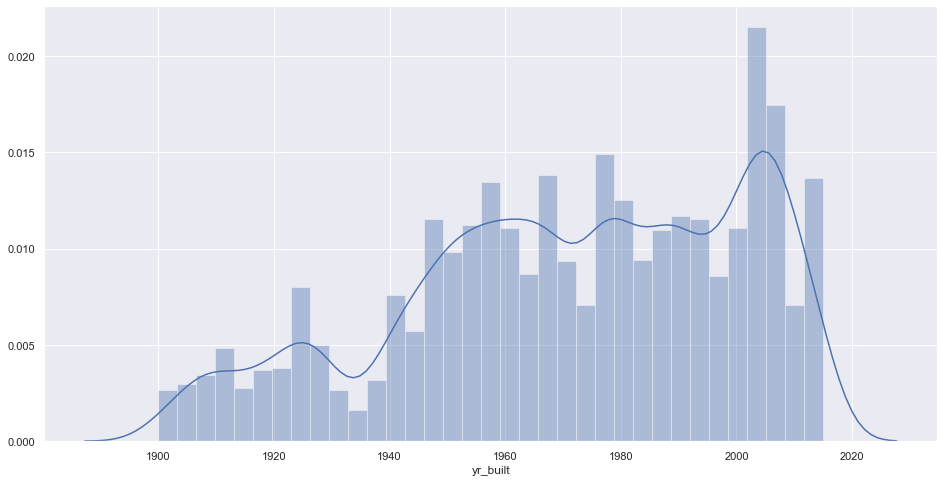

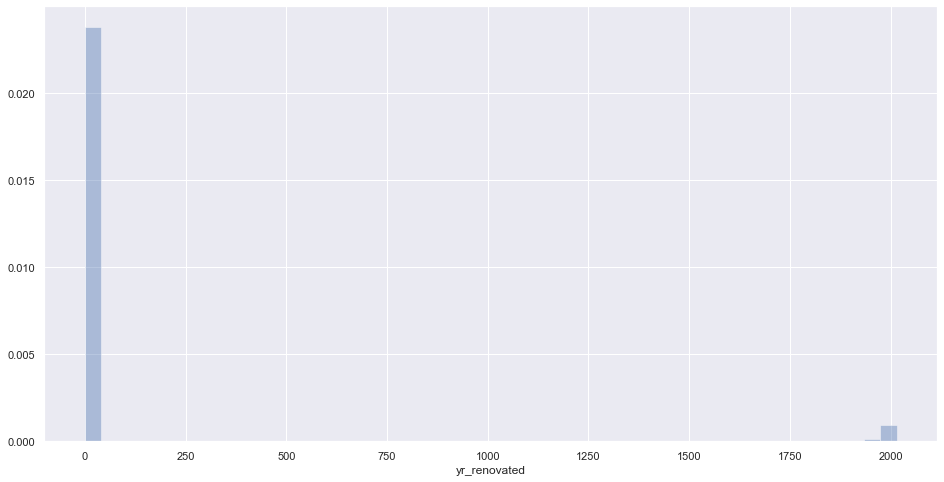

In [11]:
df_hist(discrete_df);

Some of these discrete variables can be grouped by. Based on The visualisation on Tableau and the data quesries on SQL I thought about grouping based on counts of each discrete variables.

In [12]:
data['bathrooms'].describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [13]:
def group_bath(x):
        if x <= 1.75:
            return 'up to 1.75'
        elif x > 1.75 and x <= 2.50:
            return 'up to 2.50'
        else:
            return 'more than 3'

In [14]:
data['bathrooms'] = list(map(group_bath, data['bathrooms']))

In [15]:
data['bathrooms'].value_counts()

up to 2.50     9354
up to 1.75     8428
more than 3    3815
Name: bathrooms, dtype: int64

In [16]:
data['view'].describe()

count    21597.000000
mean         0.234292
std          0.766390
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [17]:
def group_view(x):
    if x > 1:
        return 'with a view'
    else:
        return 'without a view'

In [18]:
data['view'] = list(map(group_view, data['view']))

In [19]:
data['view'].value_counts()

without a view    19807
with a view        1790
Name: view, dtype: int64

In [20]:
data['grade'].describe()

count    21597.000000
mean         7.657915
std          1.173200
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [21]:
def group_grade(x):
    if x >= 6 and x<= 10:
        return 'very good'
    elif x < 6:
        return 'poor'
    else:
        return 'excellent'

In [22]:
data['grade'] = list(map(group_grade, data['grade']))

In [23]:
data['grade'].value_counts()

very good    20826
excellent      501
poor           270
Name: grade, dtype: int64

In [24]:
data['yr_built'].describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [25]:
def group_years(x):
    if x >= 1900 and x<= 2000:
        return 'old'
    elif x> 2000 and x <= 2010:
        return 'new'
    else:
        return 'brand new'

In [26]:
data['yr_built'] = list(map(group_years, data['yr_built']))

In [27]:
data['yr_built'].value_counts()

old          17059
new           3440
brand new     1098
Name: yr_built, dtype: int64

In [28]:
data['yr_renovated'].describe()


count    21597.000000
mean        84.464787
std        401.821438
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [29]:
def group_renovation(x):
    if x > 0:
        return 'renovated'
    else:
        return 'not renovated'

In [30]:
data['yr_renovated'] = list(map(group_renovation, data['yr_renovated']))

In [31]:
data['yr_renovated'].value_counts()

not renovated    20683
renovated          914
Name: yr_renovated, dtype: int64

In [32]:
data['floors'].describe()

count    21597.000000
mean         1.494096
std          0.539683
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [33]:
def group_floors(x):
    if x == 1:
        return '1 floor'
    elif x >1 and x <=2:
        return 'up to 2 floors'
    else:
        return 'more than 2 floors'

In [34]:
data['floors'] = list(map(group_floors, data['floors']))


In [35]:
data['floors'].value_counts()

1 floor               10673
up to 2 floors        10145
more than 2 floors      779
Name: floors, dtype: int64

In [36]:
data

,sqft_above,sqft_living15,bathrooms,view,sqft_basement,floors,grade,condition,yr_built,yr_renovated,price
0,1450,1260,up to 1.75,without a view,0,1 floor,very good,4,old,not renovated,435000
1,3310,2380,up to 2.50,without a view,0,up to 2 floors,very good,3,brand new,not renovated,555000
2,1140,2200,up to 2.50,without a view,800,1 floor,very good,4,old,not renovated,550000
3,1280,1590,up to 2.50,without a view,350,up to 2 floors,very good,3,new,not renovated,295000
4,1700,2380,up to 2.50,without a view,900,1 floor,very good,4,old,not renovated,790000
...,...,...,...,...,...,...,...,...,...,...,...
21592,1380,1810,up to 1.75,without a view,600,1 floor,very good,4,old,not renovated,725000
21593,1410,2950,up to 2.50,without a view,0,1 floor,very good,4,old,not renovated,335000
21594,1870,1870,up to 2.50,without a view,0,up to 2 floors,very good,3,old,not renovated,450000
21595,720,920,up to 1.75,without a view,670,1 floor,very good,3,old,not renovated,445500


In [47]:
data.to_csv(r'/Users/claudia/Ironhack/Mid-Bootcamp Project/Linear_Regression_MidBootCampProject-/df_2nd_iter_feat_extract.csv')